# Results Visualisation of Various Experiments

Import packages and define filename variables.

In [22]:
import matplotlib.pyplot as plt
import json
import pandas as pd
from hydra import compose, initialize
from omegaconf import OmegaConf
import os

results_folder = "../outputs/from_server/"
results_file = "/artifacts/eval_results.json"

Initialise common function used for plotting.

In [23]:
def plot_exp_results(exp_results:dict, title: str, ylim_min=70, ylim_max=100):
    k_arr = [x for x in range(1,11)]
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    for exp_var, exp_folder in exp_results.items():
        with open(f"{results_folder}/{exp_folder}{results_file}") as f:
            results = json.load(f)
        val = results["top_10_acc_scores"]
        k_acc = [acc*100 for acc in val]
        axes.plot(k_arr, k_acc, label=exp_var)
    axes.set_xlabel('k')
    axes.set_ylabel('Top k accuracy (%)')
    axes.set_ylim([ylim_min, ylim_max])
    axes.set_title(title)
    axes.legend(loc='lower right')

In [24]:
k_accs = [i for i in range(10)]
k_accs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Experiment 1: Increasing No. of Centroids with Corresponding No. of K-Neighbours

Using CLIP image features with KNN classifier and various number of retrained centroids computed via k-means++

In [25]:
exp1_results = {
    "10 centroids, 10 neighbours": "2023-09-24/01-06-01",
    "20 centroids, 20 neighbours": "2023-09-28/22-32-12",
    "30 centroids, 30 neighbours": "2023-09-01/14-45-36",
    "40 centroids, 40 neighbours": "2023-09-28/22-37-06",
    "50 centroids, 50 neighbours": "2023-09-28/22-41-16",
}

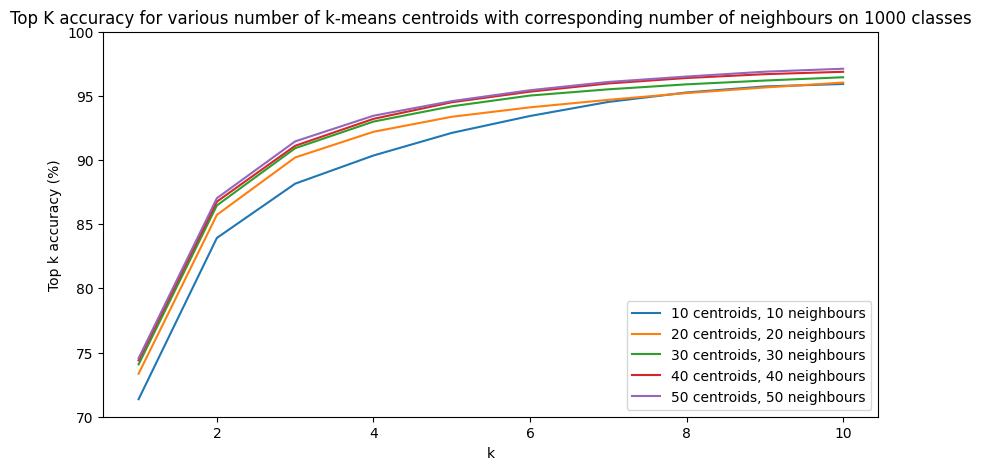

In [26]:
plot_exp_results(exp1_results, "Top K accuracy for various number of k-means centroids with corresponding number of neighbours on 1000 classes")

### Experiment 2: Different Number of Centroids

Using CLIP image features with k=10 KNN classifier and various number of retrained centroids computed via k-means++

In [27]:
exp2_results = {
    "10 centroids": "2023-09-24/01-06-01",
    "20 centroids": "2023-09-24/08-48-04",
    "30 centroids": "2023-09-23/23-43-50",
    "40 centroids": "2023-09-24/09-07-09",
    "50 centroids": "2023-09-24/09-25-44",
}

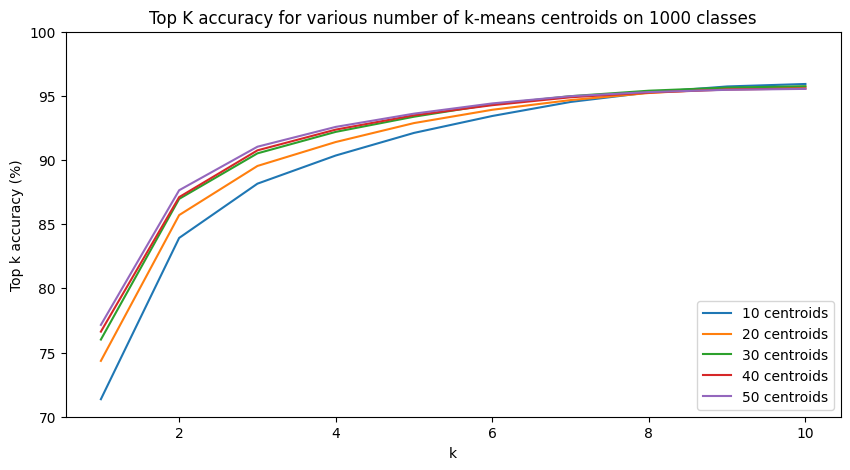

In [28]:
plot_exp_results(
    exp2_results,
    "Top K accuracy for various number of k-means centroids on 1000 classes",
    # ylim_min=94, ylim_max=97 # to see top 10 more clearly
)

### Experiment 3: Different Number of Neighbours for KNN Classifier

Using CLIP image features with 30 retrained centroids computed via k-means++

In [29]:
exp3_results = {
    "5 neighbours": "2023-09-23/23-38-27",
    "10 neighbours": "2023-09-23/23-43-50",
    "15 neighbours": "2023-09-23/23-47-36",
    "20 neighbours": "2023-09-23/23-50-32",
    "25 neighbours": "2023-09-23/23-55-20",
    "30 neighbours": "2023-09-01/14-45-36",
}

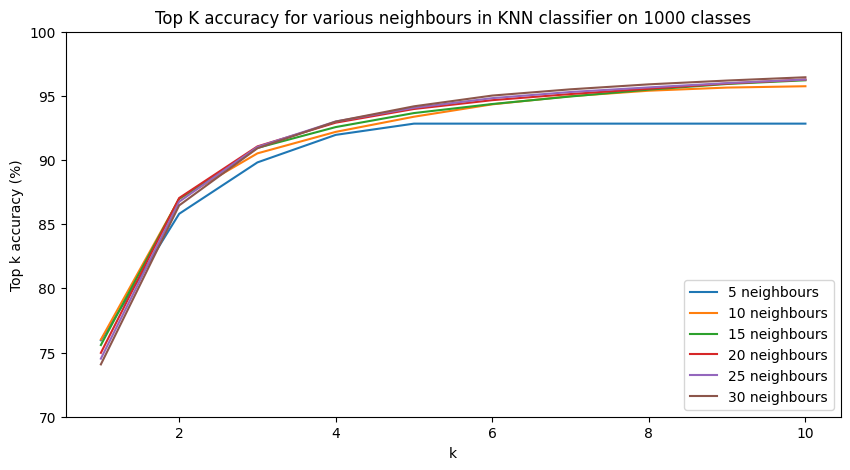

In [30]:
plot_exp_results(
    exp3_results,
    "Top K accuracy for various neighbours in KNN classifier on 1000 classes",
    # ylim_min=90, ylim_max=100 # to see top 10 more clearly
    # ylim_min=74, ylim_max=87 # to see top 1 more clearly
)

### Experiment 4: Different Feature Extractors

Using 30 retrained centroids computed via k-means++ and knn classifier

In [31]:
exp4_results = {
    "clip-vit-large-patch14 (768 features)": "2023-09-01/14-45-36",
    "resnet50_IMAGENET1K_V2 (2048 features)": "2023-09-02/13-06-39",
    "inceptionV3_IMAGENET1K_V1 (2048 features)": "2023-09-07/10-24-06",
}

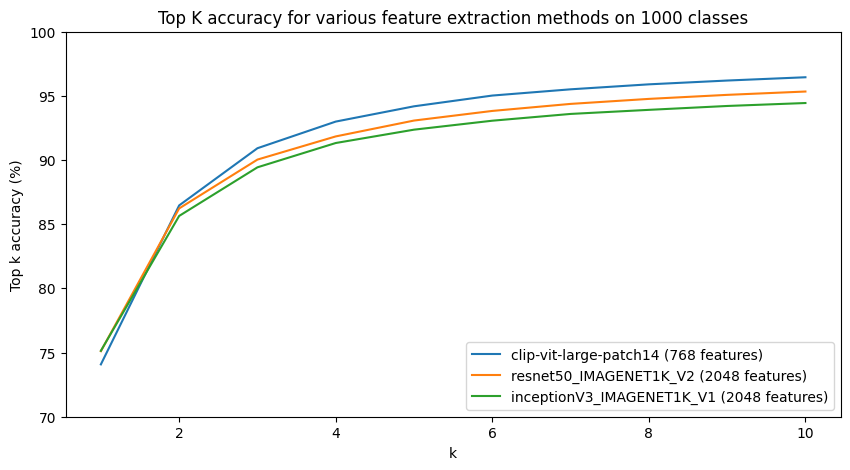

In [32]:
plot_exp_results(
    exp4_results,
    "Top K accuracy for various feature extraction methods on 1000 classes"
)

### Experiment 5: Comparing Different Centroid Computation Methods

Using CLIP image features with KNN classifier with 30 k-means centroids computed via retrained kmeans and mini batch kmeans (a.k.a streaming or weighted average)

In [33]:
exp5_results = {
    "100% Retrained": "2023-09-01/14-45-36",
    "50% Incremental Size": "2023-12-29/00-50-02",
    "25% Incremental Size": "2023-12-29/01-11-04",
    "10% Incremental Size": "2023-12-29/01-27-51",
    "5% Incremental Size": "2023-12-29/01-42-17",
}

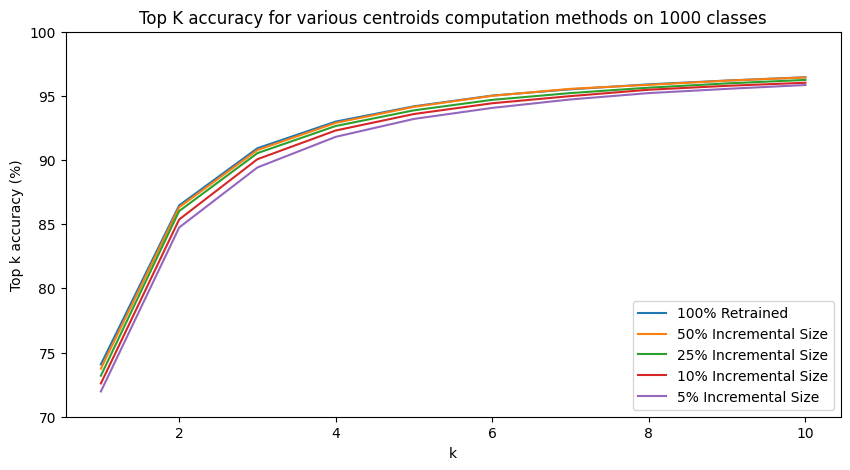

In [34]:
plot_exp_results(exp5_results, "Top K accuracy for various centroids computation methods on 1000 classes", ylim_min=70)

### Experiment 6: Comparing Centroids vs. No Centroids

Comparing the results of applying KNN classifier on CLIP embeddings directly and on centroids of CLIP embeddings

In [35]:
# Initialise function used only by Experiment 6
def plot_no_centroid_results(exp_results:dict, title: str, ylim_min=70, ylim_max=100):
    labels = [f"Top {i} Accuracy" for i in range(1,11)]
    k_accs = [[] for i in range(10)]
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    for exp_var, exp_folder in exp_results.items():
        with open(f"{results_folder}/{exp_folder}{results_file}") as f:
            results = json.load(f)
        val = results["top_10_acc_scores"]
        for idx, acc in enumerate(val):
            k_accs[idx].append(acc*100)

    start_range = 0
    end_range = 13
    for i in range(0,5):    
        axes.plot(num_neighbors[start_range: end_range], k_accs[i][start_range: end_range], label=labels[i])
    axes.set_xlabel('Number of Neighbours')
    axes.set_ylabel('Accuracy Score(%)')
    axes.set_ylim([ylim_min, ylim_max])
    axes.set_title(title)
    axes.legend()

Experiment 6a Observations
- More neighbours don't mean better results.
- While increasing the number of neighbours at the start shows improvement in the accuracy scores initially, the trend doesn't continue at bigger number of neighbours.

In [36]:
exp6a_results = {
    "1 neighbours w/o centroids": "2024-07-31/19-57-06",
    "3 neighbours w/o centroids": "2024-07-31/20-38-17",
    "5 neighbours w/o centroids": "2024-07-31/21-09-32",
    "10 neighbours w/o centroids": "2024-07-30/20-44-04",
    "20 neighbours w/o centroids": "2024-07-30/20-48-20",
    "30 neighbours w/o centroids": "2024-07-30/20-51-52",
    "40 neighbours w/o centroids": "2024-07-30/20-55-56",
    "50 neighbours w/o centroids": "2024-07-30/20-59-31",
    "60 neighbours w/o centroids": "2024-07-30/21-03-09",
    "70 neighbours w/o centroids": "2024-07-30/21-04-02",
    "80 neighbours w/o centroids": "2024-07-30/21-08-14",
    "90 neighbours w/o centroids": "2024-07-30/21-09-46",
    "100 neighbours w/o centroids": "2024-07-30/21-12-06",
    "200 neighbours w/o centroids": "2024-07-30/21-13-37",
    "300 neighbours w/o centroids": "2024-07-30/21-14-30",
    "400 neighbours w/o centroids": "2024-07-30/21-16-07",
    "500 neighbours w/o centroids": "2024-07-30/21-17-51",
    "600 neighbours w/o centroids": "2024-07-30/21-18-56",
    "700 neighbours w/o centroids": "2024-07-30/21-20-43",
    "800 neighbours w/o centroids": "2024-07-30/21-24-05",
    "900 neighbours w/o centroids": "2024-07-30/21-24-54",
    "1000 neighbours w/o centroids": "2024-07-30/21-25-50",
}

num_neighbors = [1, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

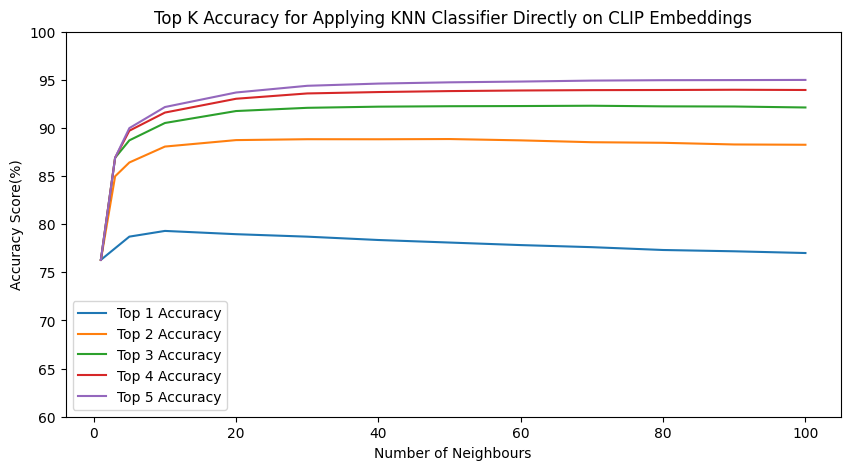

In [37]:
plot_no_centroid_results(exp6a_results, "Top K Accuracy for Applying KNN Classifier Directly on CLIP Embeddings", 60, 100)

Experiment 6b is about using Nakata's chosen parameter of 10 neighbours.

Observations
- Use of centroids as proposed by us leads to better top-k accuracy for larger values of k starting from 5 onwards
- Trade-off for better generalizability comes at the expense of a compromise in performance when the predictions need to be specific.

In [38]:
exp6b_results = {
    "10 neighbours w/o centroids": "2024-07-30/20-44-04",
    "10 neighbours w centroids": "2023-09-24/01-06-01"
}

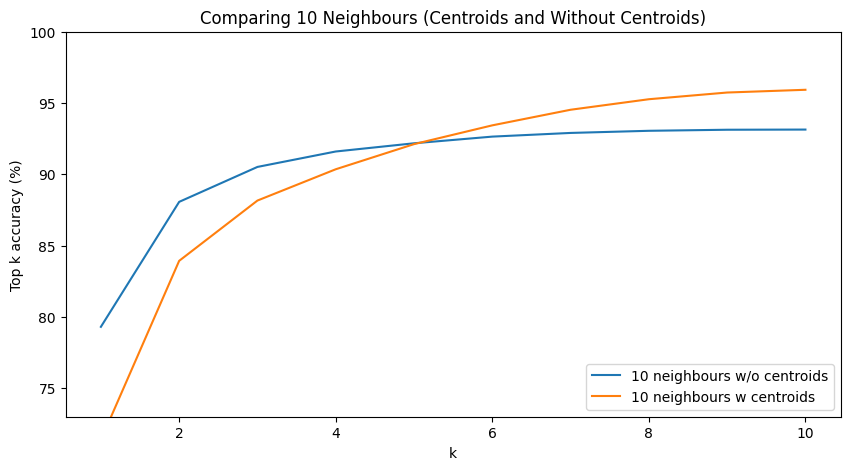

In [39]:
plot_exp_results(exp6b_results, "Comparing 10 Neighbours (Centroids and Without Centroids)", 73, 100)

Experiment 6c is about repeating Experiment 6b with our chosen baseline of 30 neighbours.

Observations:
- Our top-k accuracy score is improved.

In [40]:
exp6c_results = {
    "30 neighbours w/o centroids": "2024-07-30/20-51-52",
    "30 neighbours w centroids": "2023-09-01/14-45-36"
}

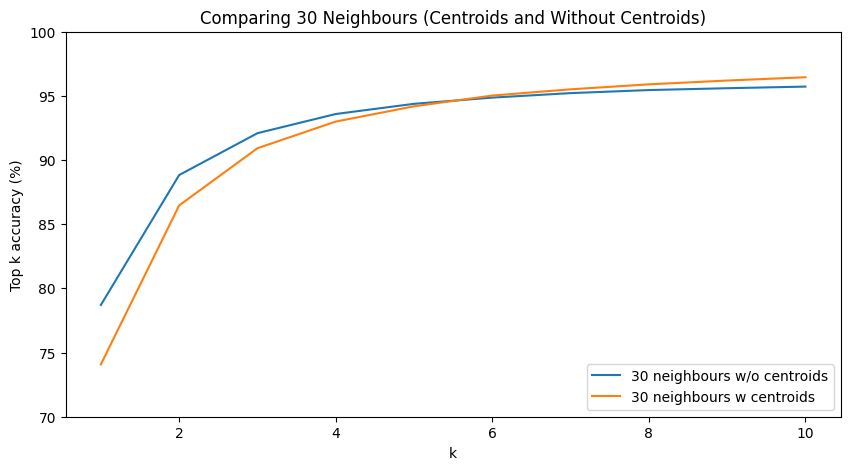

In [41]:
plot_exp_results(exp6c_results, "Comparing 30 Neighbours (Centroids and Without Centroids)", 70, 100)

### Compile Results into Pandas Dataframe and Excel (For Experiment 1 to 5)

In [13]:
experiments = [exp1_results, exp2_results, exp3_results, exp4_results, exp5_results]

experiment_configs = []

for day_folder in os.listdir(results_folder):
    for time_folder in os.listdir(f"{results_folder}/{day_folder}"):
        with initialize(config_path=f"{results_folder}/{day_folder}/{time_folder}/config", version_base=None):
            config = compose(config_name="experiment")
            experiment_config = OmegaConf.to_container(config.experiment, resolve=True)
        experiment_config["results_folder"] = f"{day_folder}/{time_folder}"
        with open(f"{results_folder}/{day_folder}/{time_folder}/{results_file}") as f:
            results = json.load(f)
        val = results["top_10_acc_scores"]
        k_acc = [acc*100 for acc in val]
        for i in range(10):
            experiment_config[f"top_{i+1}_acc"] = k_acc[i]
        
        experiment_config["exp1"] = f"{day_folder}/{time_folder}" in exp1_results.values()
        experiment_config["exp2"] = f"{day_folder}/{time_folder}" in exp2_results.values()
        experiment_config["exp3"] = f"{day_folder}/{time_folder}" in exp3_results.values()
        experiment_config["exp4"] = f"{day_folder}/{time_folder}" in exp4_results.values()
        experiment_config["exp5"] = f"{day_folder}/{time_folder}" in exp5_results.values()
        
        experiment_configs.append(experiment_config)

df = pd.DataFrame(experiment_configs)
print(f"{len(df.columns)} columns")

arrange_cols = [
    "results_folder",
    "train_data_folder",
    "eval_data_folder",
    "embed_model",
    "embed_model_version",
    "use_centroids",
    "centroids_cluster",
    "kmeans",
    "knn",
    "seed"
]
arrange_cols += [f"top_{i+1}_acc" for i in range(10)]
arrange_cols += ["exp1", "exp2", "exp3", "exp4", "exp5"]
print(f"{len(arrange_cols)} arranged columns")

df = df[arrange_cols]

# Save to excel
df.to_excel("results.xlsx", index=False)


# For display
display_df = df.copy()
display_df["kmeans_num_centroids"] = display_df["kmeans"].apply(lambda x: x["num_centroids"])
display_df["knn_num_neighbours"] = display_df["knn"].apply(lambda x: x["num_neighbors"])
display_columns = ["embed_model_version", "kmeans_num_centroids", "knn_num_neighbours"] + [f"top_{i+1}_acc" for i in range(10)] + ["exp1", "exp2", "exp3", "exp4", "exp5"]
display_df[display_columns]

26 columns
25 arranged columns


,embed_model_version,kmeans_num_centroids,knn_num_neighbours,top_1_acc,top_2_acc,top_3_acc,top_4_acc,top_5_acc,top_6_acc,top_7_acc,top_8_acc,top_9_acc,top_10_acc,exp1,exp2,exp3,exp4,exp5
0,clip-vit-large-patch14,30,30,74.078,86.466,90.922,92.998,94.188,95.026,95.512,95.900,96.196,96.452,True,False,True,True,True
1,resnet50_IMAGENET1K_V2,30,30,75.108,86.232,90.036,91.842,93.078,93.828,94.376,94.766,95.080,95.340,False,False,False,True,False
2,inceptionV3_IMAGENET1K_V1,30,30,75.138,85.646,89.434,91.328,92.368,93.066,93.594,93.912,94.214,94.444,False,False,False,True,False
3,clip-vit-large-patch14,30,5,75.956,85.812,89.818,91.962,92.838,92.838,92.838,92.838,92.838,92.838,False,False,True,False,False
4,clip-vit-large-patch14,30,10,76.012,86.974,90.522,92.196,93.378,94.342,94.978,95.404,95.648,95.752,False,True,True,False,False
5,clip-vit-large-patch14,30,15,75.586,86.984,90.948,92.570,93.662,94.366,94.954,95.488,95.928,96.216,False,False,True,False,False
6,clip-vit-large-patch14,30,20,74.976,87.042,91.066,92.914,93.980,94.666,95.144,95.558,95.966,96.272,False,False,True,False,False
7,clip-vit-large-patch14,30,25,74.526,86.754,91.022,93.006,94.074,94.824,95.304,95.662,95.996,96.272,False,False,True,False,False
8,clip-vit-large-patch14,10,10,71.364,83.932,88.160,90.354,92.116,93.434,94.528,95.266,95.736,95.928,True,True,False,False,False
9,clip-vit-large-patch14,20,10,74.352,85.712,89.540,91.406,92.882,93.918,94.674,95.224,95.560,95.716,False,True,False,False,False


Results Table for Experiment 1: Increasing No. of Centroids with Corresponding No. of K-Neighbours

In [14]:
display_df[display_columns][display_df["exp1"] == True].sort_values(by="kmeans_num_centroids")

,embed_model_version,kmeans_num_centroids,knn_num_neighbours,top_1_acc,top_2_acc,top_3_acc,top_4_acc,top_5_acc,top_6_acc,top_7_acc,top_8_acc,top_9_acc,top_10_acc,exp1,exp2,exp3,exp4,exp5
8,clip-vit-large-patch14,10,10,71.364,83.932,88.160,90.354,92.116,93.434,94.528,95.266,95.736,95.928,True,True,False,False,False
12,clip-vit-large-patch14,20,20,73.354,85.732,90.202,92.202,93.372,94.108,94.692,95.218,95.656,96.036,True,False,False,False,False
0,clip-vit-large-patch14,30,30,74.078,86.466,90.922,92.998,94.188,95.026,95.512,95.900,96.196,96.452,True,False,True,True,True
13,clip-vit-large-patch14,40,40,74.396,86.762,91.114,93.210,94.502,95.328,95.968,96.394,96.692,96.878,True,False,False,False,False
14,clip-vit-large-patch14,50,50,74.554,87.030,91.456,93.454,94.592,95.442,96.086,96.508,96.886,97.116,True,False,False,False,False


Results Table for Experiment 2: Different Number of Centroids

In [15]:
display_df[display_columns][display_df["exp2"] == True].sort_values(by="kmeans_num_centroids")

,embed_model_version,kmeans_num_centroids,knn_num_neighbours,top_1_acc,top_2_acc,top_3_acc,top_4_acc,top_5_acc,top_6_acc,top_7_acc,top_8_acc,top_9_acc,top_10_acc,exp1,exp2,exp3,exp4,exp5
8,clip-vit-large-patch14,10,10,71.364,83.932,88.160,90.354,92.116,93.434,94.528,95.266,95.736,95.928,True,True,False,False,False
9,clip-vit-large-patch14,20,10,74.352,85.712,89.540,91.406,92.882,93.918,94.674,95.224,95.560,95.716,False,True,False,False,False
4,clip-vit-large-patch14,30,10,76.012,86.974,90.522,92.196,93.378,94.342,94.978,95.404,95.648,95.752,False,True,True,False,False
10,clip-vit-large-patch14,40,10,76.630,87.112,90.756,92.372,93.488,94.276,94.892,95.258,95.494,95.574,False,True,False,False,False
11,clip-vit-large-patch14,50,10,77.154,87.648,91.040,92.584,93.616,94.414,94.978,95.298,95.474,95.546,False,True,False,False,False


Results Table for Experiment 3: Different Number of Neighbours for KNN Classifier

In [17]:
display_df[display_columns][display_df["exp3"] == True].sort_values(by="knn_num_neighbours")

,embed_model_version,kmeans_num_centroids,knn_num_neighbours,top_1_acc,top_2_acc,top_3_acc,top_4_acc,top_5_acc,top_6_acc,top_7_acc,top_8_acc,top_9_acc,top_10_acc,exp1,exp2,exp3,exp4,exp5
3,clip-vit-large-patch14,30,5,75.956,85.812,89.818,91.962,92.838,92.838,92.838,92.838,92.838,92.838,False,False,True,False,False
4,clip-vit-large-patch14,30,10,76.012,86.974,90.522,92.196,93.378,94.342,94.978,95.404,95.648,95.752,False,True,True,False,False
5,clip-vit-large-patch14,30,15,75.586,86.984,90.948,92.570,93.662,94.366,94.954,95.488,95.928,96.216,False,False,True,False,False
6,clip-vit-large-patch14,30,20,74.976,87.042,91.066,92.914,93.980,94.666,95.144,95.558,95.966,96.272,False,False,True,False,False
7,clip-vit-large-patch14,30,25,74.526,86.754,91.022,93.006,94.074,94.824,95.304,95.662,95.996,96.272,False,False,True,False,False
0,clip-vit-large-patch14,30,30,74.078,86.466,90.922,92.998,94.188,95.026,95.512,95.900,96.196,96.452,True,False,True,True,True


Results Table for Experiment 4: Different Feature Extractors

In [18]:
display_df[display_columns][display_df["exp4"] == True]

,embed_model_version,kmeans_num_centroids,knn_num_neighbours,top_1_acc,top_2_acc,top_3_acc,top_4_acc,top_5_acc,top_6_acc,top_7_acc,top_8_acc,top_9_acc,top_10_acc,exp1,exp2,exp3,exp4,exp5
0,clip-vit-large-patch14,30,30,74.078,86.466,90.922,92.998,94.188,95.026,95.512,95.900,96.196,96.452,True,False,True,True,True
1,resnet50_IMAGENET1K_V2,30,30,75.108,86.232,90.036,91.842,93.078,93.828,94.376,94.766,95.080,95.340,False,False,False,True,False
2,inceptionV3_IMAGENET1K_V1,30,30,75.138,85.646,89.434,91.328,92.368,93.066,93.594,93.912,94.214,94.444,False,False,False,True,False


Results Table for Experiment 5: Comparing Different Centroid Computation Methods

In [19]:
display_df["kmeans_incremental_step"] = display_df["kmeans"].apply(lambda x: x["incremental_step"])
exp5_display_columns = ["embed_model_version", "centroids_cluster", "kmeans_incremental_step", "kmeans_num_centroids", "knn_num_neighbours"] + [f"top_{i+1}_acc" for i in range(10)] + ["exp1", "exp2", "exp3", "exp4", "exp5"]
display_df[exp5_display_columns][display_df["exp5"] == True]

,embed_model_version,centroids_cluster,kmeans_incremental_step,kmeans_num_centroids,knn_num_neighbours,top_1_acc,top_2_acc,top_3_acc,top_4_acc,top_5_acc,top_6_acc,top_7_acc,top_8_acc,top_9_acc,top_10_acc,exp1,exp2,exp3,exp4,exp5
0,clip-vit-large-patch14,kmeans,NaN,30,30,74.078,86.466,90.922,92.998,94.188,95.026,95.512,95.900,96.196,96.452,True,False,True,True,True
19,clip-vit-large-patch14,minibatchkmeans,0.50,30,30,73.744,86.320,90.782,92.894,94.148,95.006,95.550,95.862,96.190,96.438,False,False,False,False,True
20,clip-vit-large-patch14,minibatchkmeans,0.25,30,30,73.196,86.024,90.540,92.654,93.876,94.692,95.220,95.642,95.974,96.244,False,False,False,False,True
21,clip-vit-large-patch14,minibatchkmeans,0.10,30,30,72.590,85.370,90.068,92.304,93.588,94.426,94.984,95.480,95.784,96.024,False,False,False,False,True
22,clip-vit-large-patch14,minibatchkmeans,0.05,30,30,71.968,84.744,89.424,91.810,93.206,94.064,94.724,95.218,95.548,95.848,False,False,False,False,True
